# Домашнее задание №12. Деревья решений

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.path import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Задание 1
Представьте, что вы преподаете на курсе по искуственному интеллекту. Пришло время зачета. Вы провели тест, по результатам которого определили, знает или не знает студент каждую из пройденных тем. Однако времени придумывать критерии зачета у вас не было, поэтому вы просто поставили зачеты и незачеты случайным образом. Результаты вы записали в табличку в файле `dt-1.xlsx`.

Когда студенты узнали результаты, они почему-то возмутились, и просят вас объяснить, по каким критериям выставлялся зачет.

Менять данные уже поздно, поэтому придется подгонять критерии под них. От вас требуется построить дерево решений, соответствующее результатам, и вывести его. А также определить три темы, оказывающие наибольшее влияние на выставление зачета (чтобы студенты знали, по каким темам надо лучше подготовиться к пересдаче).

In [67]:
task1 = pd.read_excel("dt-1.xlsx")
task1.head()

X = task1.drop('Результат', axis=1).copy()
X = X.drop('Имя', axis=1).copy()
X.head()

,Представление знаний,Нечеткая логика,Генетические алгоритмы,Перцептрон,Нейронные сети,Линейная регрессия,Логистическая регрессия,Классификация,Решающие деревья,Отбор признаков
0,-,+,-,+,-,+,-,+,-,-
1,-,-,+,+,-,+,-,+,+,+
2,+,-,+,-,+,-,-,+,-,-
3,+,-,-,-,+,+,+,+,-,+
4,-,-,+,-,-,-,-,+,+,-


In [68]:
X.replace({"+": 1, "-": 0}, inplace=True)
X.head()

C:\Users\murza\AppData\Local\Temp\ipykernel_24108\2270966307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({"+": 1, "-": 0}, inplace=True)


,Представление знаний,Нечеткая логика,Генетические алгоритмы,Перцептрон,Нейронные сети,Линейная регрессия,Логистическая регрессия,Классификация,Решающие деревья,Отбор признаков
0,0,1,0,1,0,1,0,1,0,0
1,0,0,1,1,0,1,0,1,1,1
2,1,0,1,0,1,0,0,1,0,0
3,1,0,0,0,1,1,1,1,0,1
4,0,0,1,0,0,0,0,1,1,0


In [69]:
y = task1['Результат'].copy()
y = y.replace({"Зачет": 1, "Незачет": 0})
y.head()

C:\Users\murza\AppData\Local\Temp\ipykernel_24108\1761347116.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"Зачет": 1, "Незачет": 0})


0    0
1    0
2    1
3    0
4    0
Name: Результат, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=None)
clf = clf.fit(X_train, y_train)

param_grid = {
    # gini - минимизирует вероятность ошибочной классификации
    # entropy - энтропия, измеряет уровень неопределенности в классе
    # log_loss = логарифмическая функция потерь, которая используется для построения вероятностных предсказаний
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.001]    # обрезка дерева, позволет устранить ненужные ветви, которые могут снизить эффективность модели
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)
print("Лучшее качество (точность):")
print(grid_search.best_score_)

Лучшие параметры:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None}
Лучшее качество (точность):
0.62


In [71]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions, labels=[0, 1]))     # Матрица ошибок
print(classification_report(y_test, predictions, target_names=["Незачет","Зачет"]))

[[2 1]
 [6 3]]
              precision    recall  f1-score   support

     Незачет       0.25      0.67      0.36         3
       Зачет       0.75      0.33      0.46         9

    accuracy                           0.42        12
   macro avg       0.50      0.50      0.41        12
weighted avg       0.62      0.42      0.44        12



Названия признаков:
Index(['Представление знаний', 'Нечеткая логика', 'Генетические алгоритмы',
       'Перцептрон', 'Нейронные сети', 'Линейная регрессия',
       'Логистическая регрессия', 'Классификация', 'Решающие деревья',
       'Отбор признаков'],
      dtype='object')
Важность признаков:
[0.13939394 0.         0.11616162 0.         0.         0.0624023
 0.03318903 0.25169102 0.31004089 0.08712121]
Важность признаков (отсортировано):
                         Importance
Решающие деревья           0.310041
Классификация              0.251691
Представление знаний       0.139394
Генетические алгоритмы     0.116162
Отбор признаков            0.087121
Линейная регрессия         0.062402
Логистическая регрессия    0.033189
Нечеткая логика            0.000000
Перцептрон                 0.000000
Нейронные сети             0.000000
Признаки с положительной важностью:
['Решающие деревья', 'Классификация', 'Представление знаний', 'Генетические алгоритмы', 'Отбор признаков', 'Линейная регрес

<Figure size 1000x600 with 0 Axes>

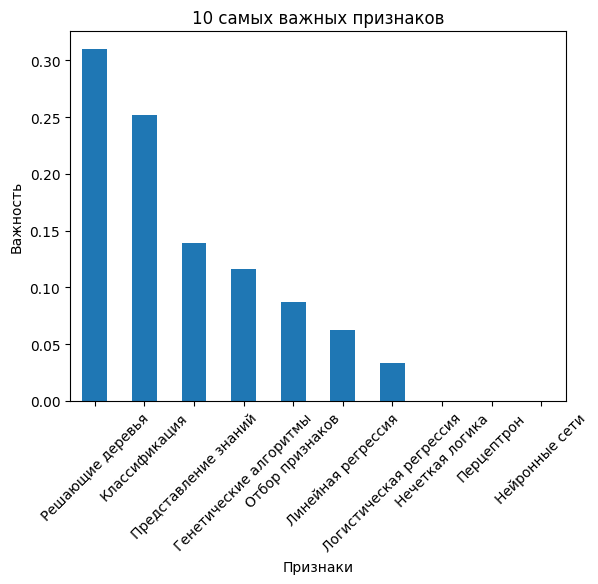

In [ ]:
feature_names = X.columns
print("Названия признаков:")
print(feature_names)

print("Важность признаков:")
print(clf.feature_importances_)

# Отображение важности признаков, добавляя имена признаков в качестве индекса
feature_importance = pd.DataFrame(clf.feature_importances_, 
                                  index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)

print("Важность признаков (отсортировано):")
print(feature_importance)

# Список признаков, у которых важность больше 0
features = list(feature_importance[feature_importance['Importance'] > 0].index)
print("Признаки с положительной важностью:")
print(features)


# Визуализация
plt.figure(figsize=(10, 6)) 
feature_importance.head(10).plot(kind="bar", legend=False)
plt.title("10 самых важных признаков")
plt.xlabel("Признаки") 
plt.ylabel("Важность")
plt.xticks(rotation=45) 
plt.show()


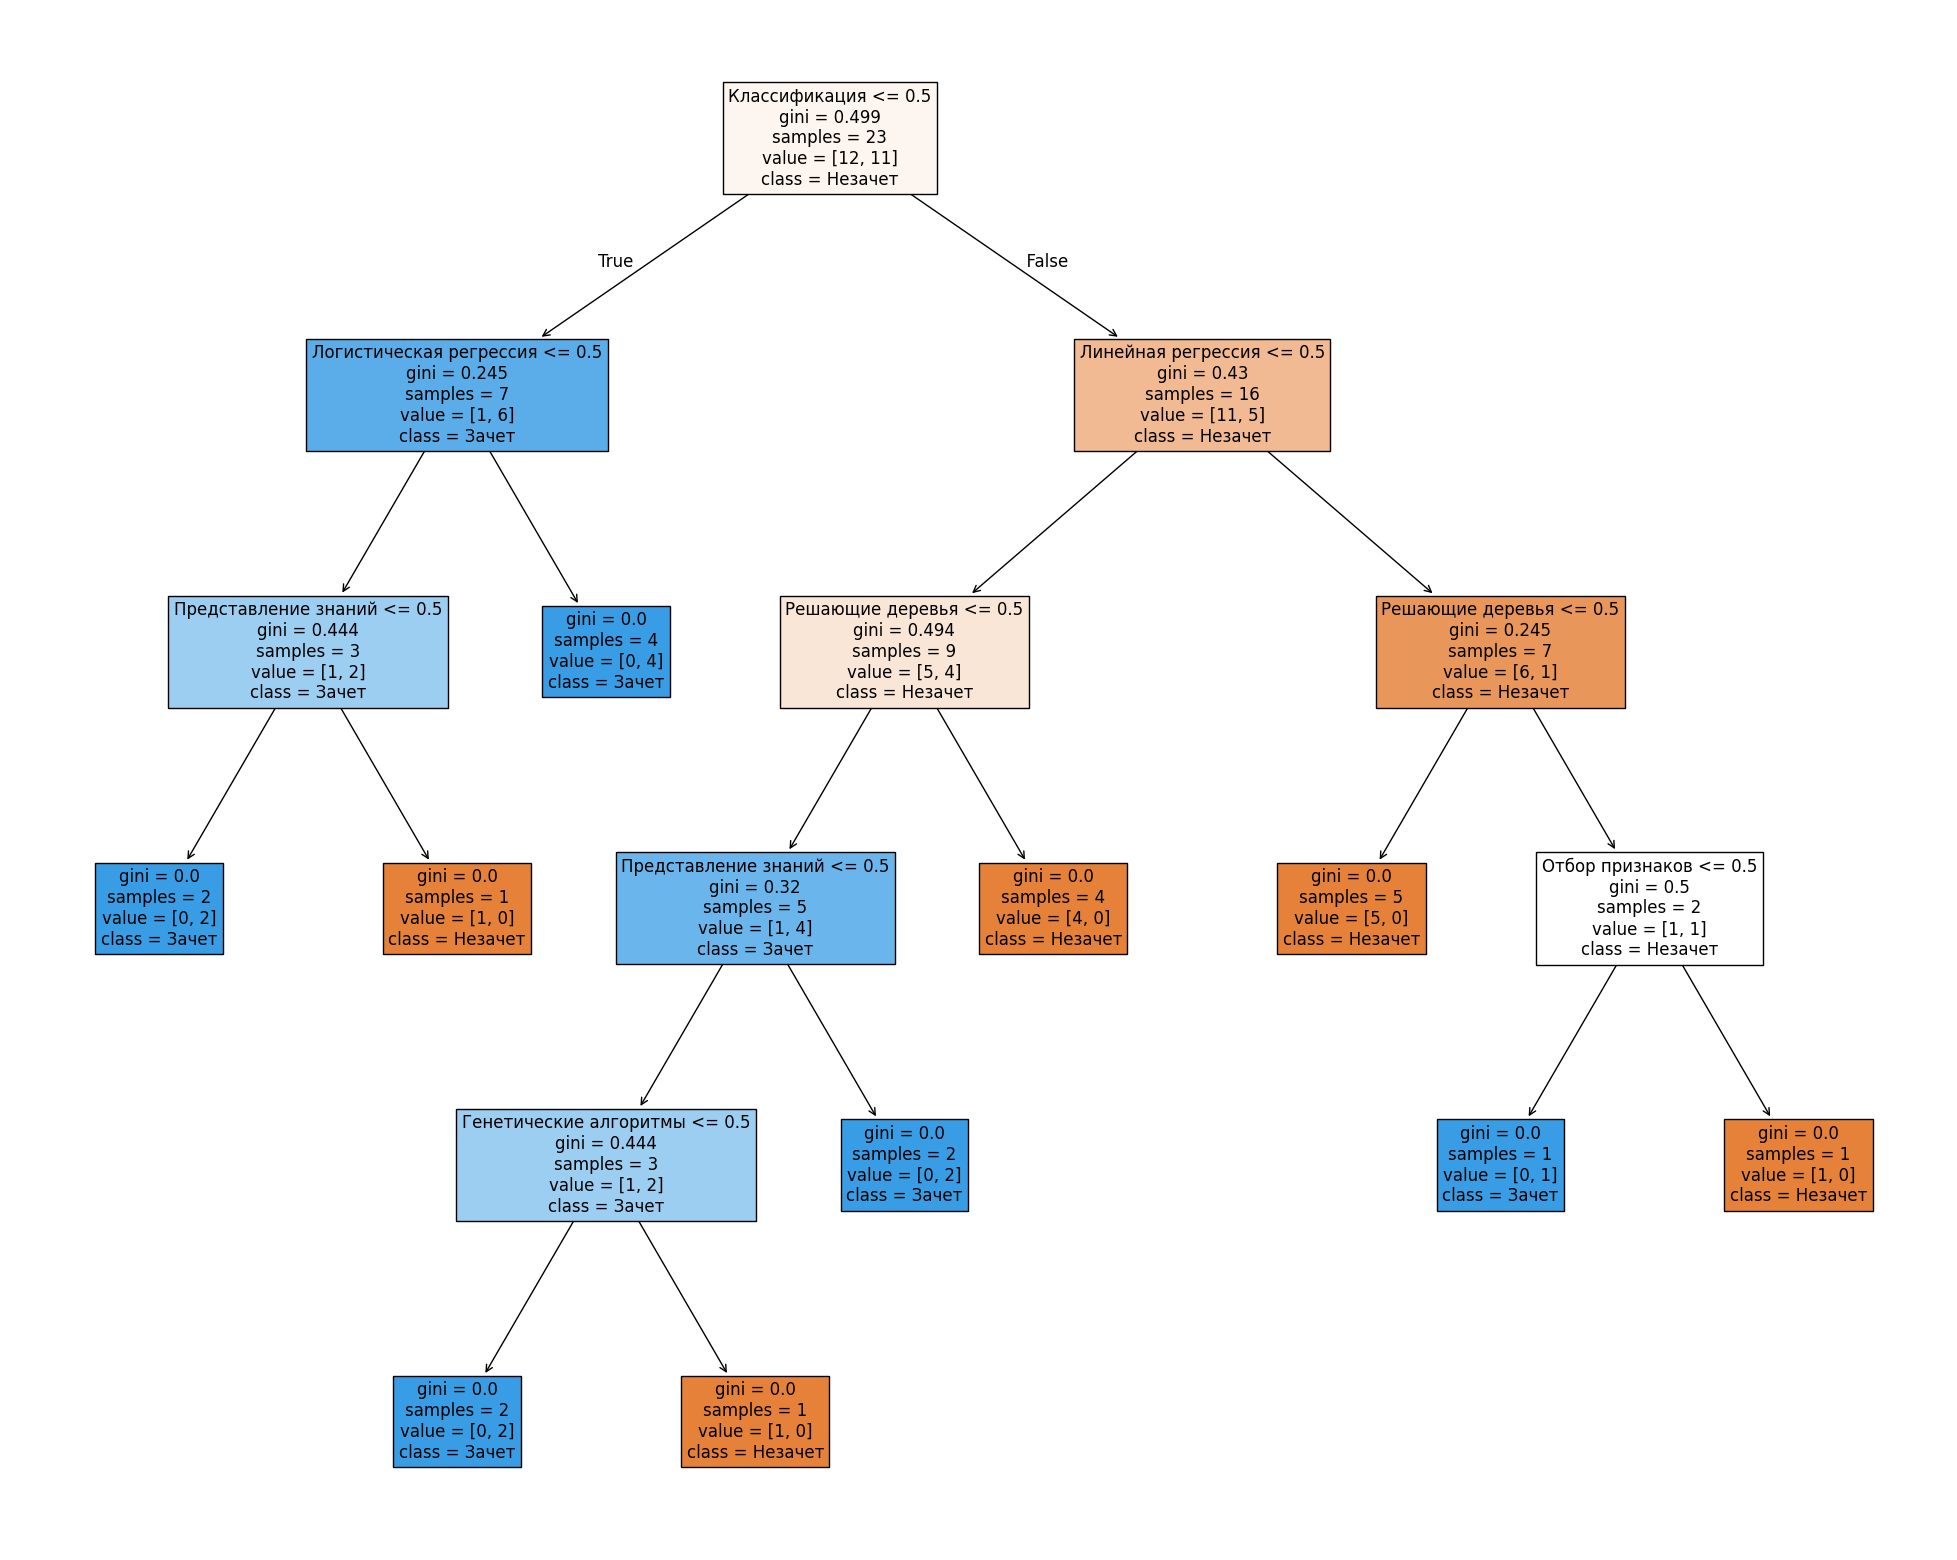

In [73]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=feature_names, class_names={0:"Незачет", 1:"Зачет"}, filled=True, fontsize=12)
plt.show()

# Задание №2

В этом задании вам предстоит определять принадлежность точки многоугольнику. Многоугольник приведен в файле `dt-2.png`, координаты вершин подписаны.

Постройте модель на основе дерева решений, которая по координатам произвольной точки будет определять принадлежность этой точки заданному многоугольнику. Визуализируйте результаты любым удобным образом.

0.8933333333333333
[[41  6]
 [ 2 26]]


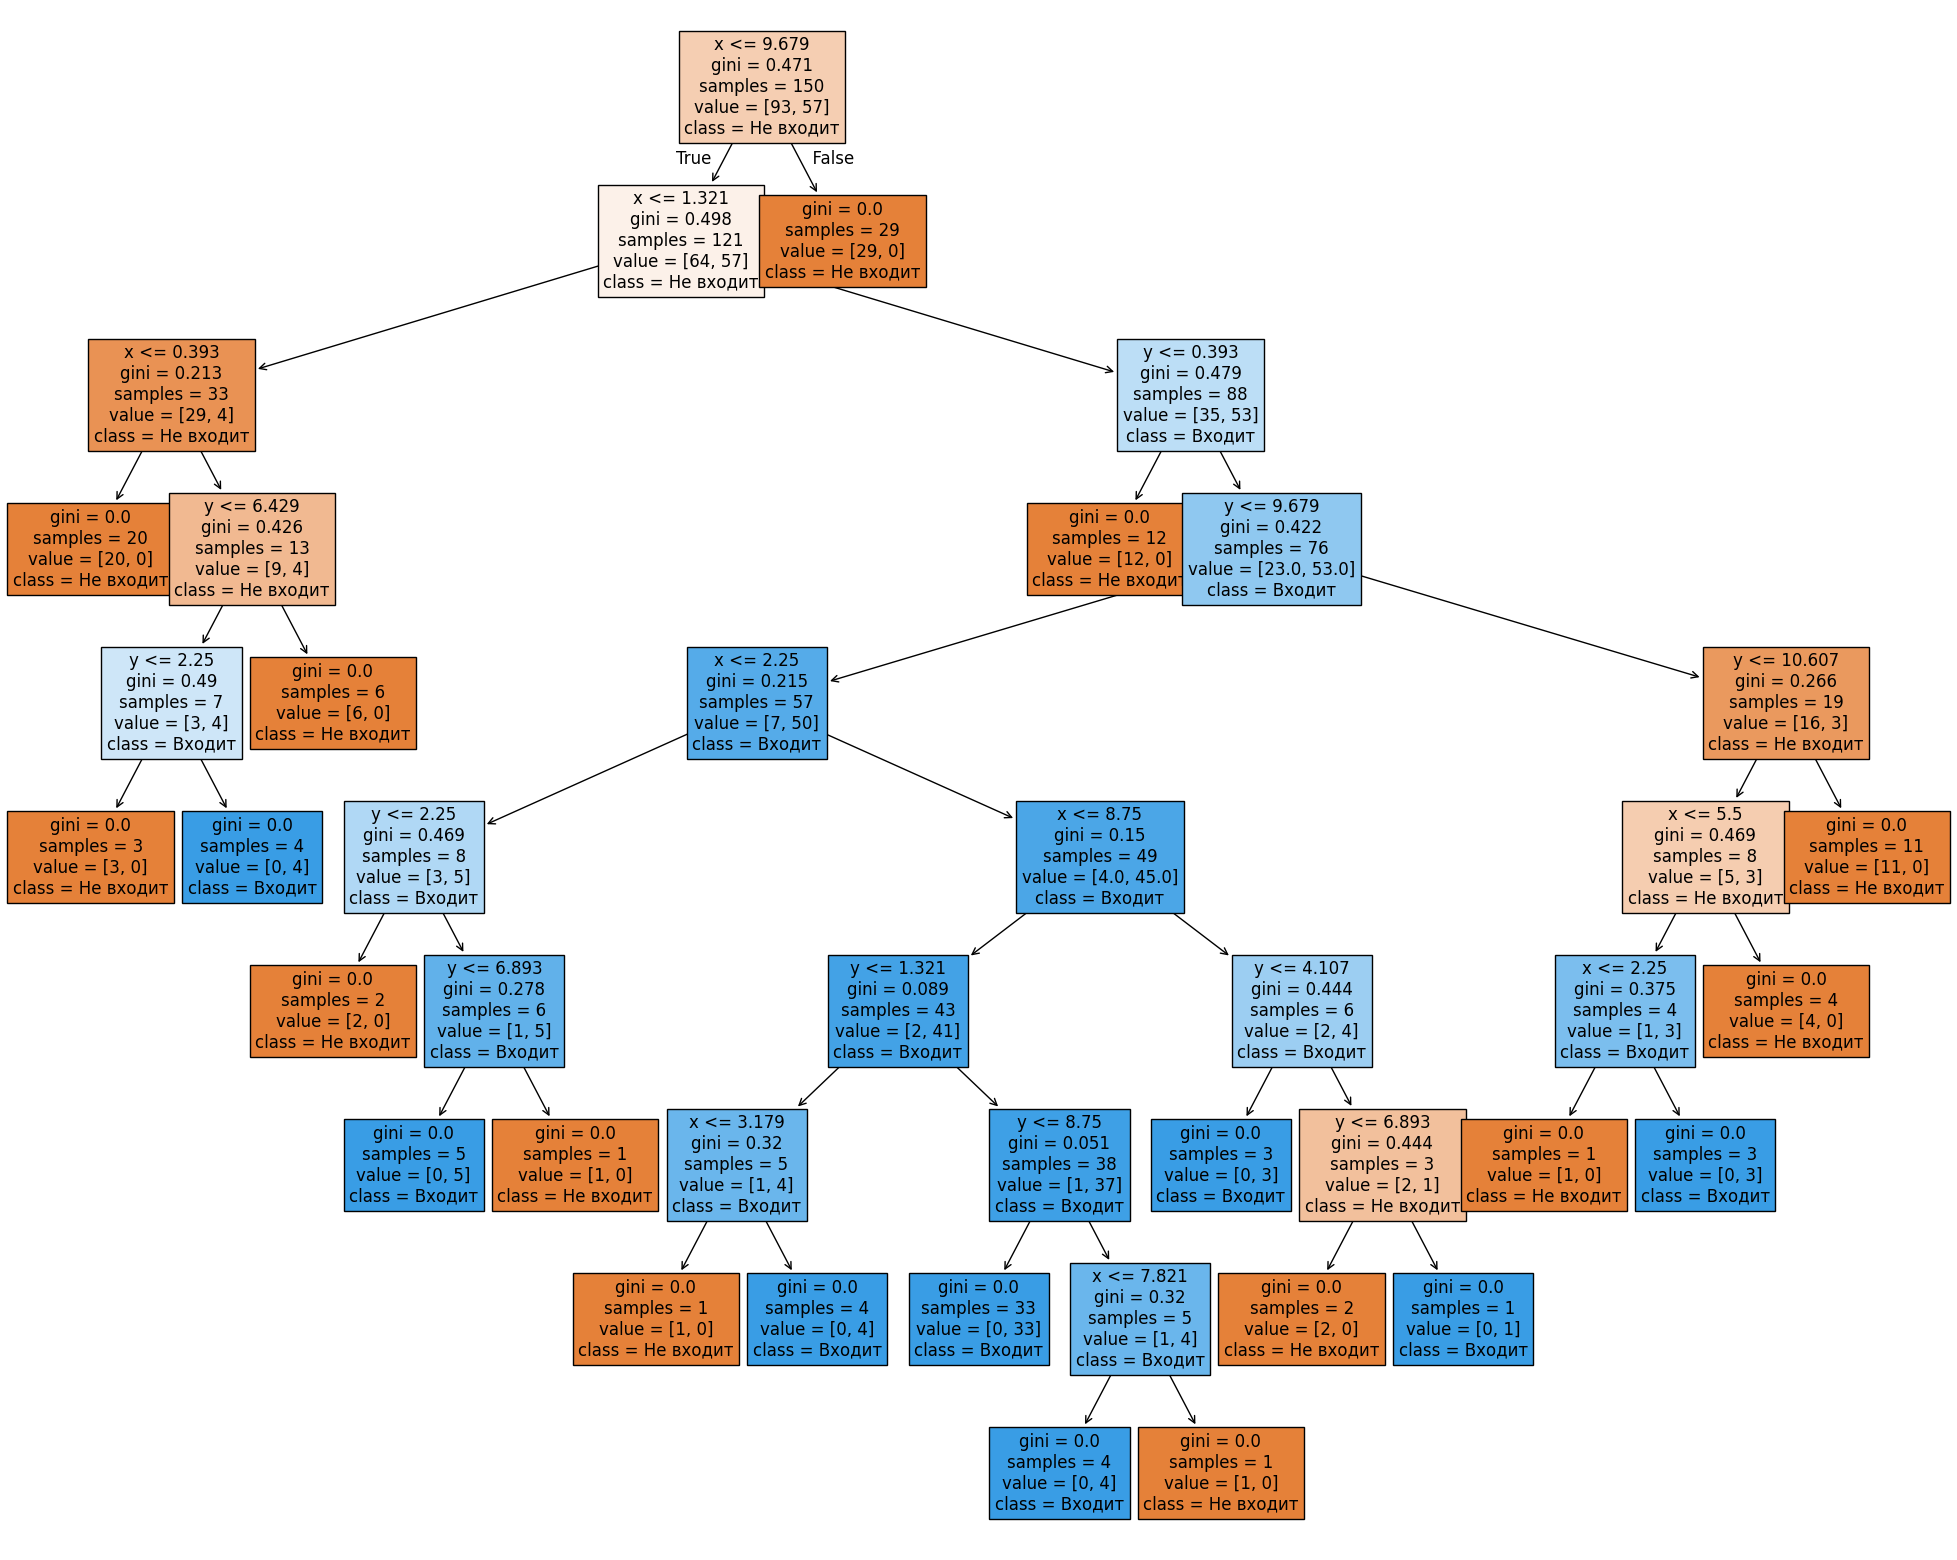

In [74]:
# Массив координат вершин многоугольника
vertices = np.array([(2, 11), (6, 10), (10, 8), (8, 5), (11, 2), (5, 0), (0, 3), (0, 6), (3, 7)])

# Функция для проверки, принадлежит ли точка многоугольнику
def is_point_in_polygon(point, vertices):
    polygon_path = Path(vertices)
    # Проверка, содержится ли точка в многоугольнике
    return polygon_path.contains_point((float(point[0]), float(point[1])))

# Списки для хранения точек и их меток (вход/не входит в многоугольник)
X = []
y = []
x_range = np.linspace(-1, 12, 15)  # 15 равномерно распределенных значений от -1 до 12
y_range = np.linspace(-1, 12, 15) 

for x in x_range:
    for y_val in y_range:
        point = (x, y_val)  # Точка с текущими координатами
        X.append(point)     
        y.append(1 if is_point_in_polygon(point, vertices) else 0)  # 1, если точка внутри многоугольника, иначе 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))  # Точность
print(confusion_matrix(y_test, predictions, labels=[0, 1]))     # Матрица ошибок

# Визуализация 
plt.figure(figsize=(25, 20))
feature_names = ["x", "y"]
tree.plot_tree(clf, feature_names=feature_names, class_names={0: "Не входит", 1: "Входит"}, filled=True, fontsize=12)
plt.show()
